# Day 3 - Afternoon

## Examples

Now that we have went over the basics of what's going on under the hood of a DFT code. Let's see these ideas occur in action!

We are going to look into the electronic structure of a **metal** and **insulator**.

**Question:** How does the electronic structure differ between a metal and insulator?

The two materials that we will investigate are
    
- Aluminum (Al)
- Table salt (NaCl)

In [1]:
using DFTK
using Plots

### Aluminium (Al)

#### Crystal structure

<img src="../../structure/al.png" alt="drawing" width="300" align="left"/>

In [2]:
# crystal structure of Aluminium (face-centerd cubic)
convert2bohr = x -> x/0.53           # in-line function
a = b = c = convert2bohr(2.856);     # lattice parameters 
positions = [[0.0, 0.0, 0.0],
              [0.5, 0.5, 0.0],
              [0.5, 0.0, 0.5], 
              [0.0, 0.5, 0.5]];

In [3]:
lattice = a * [[1 0 0]; 
               [0 1 0];
               [0 0 1]]

3×3 Array{Float64,2}:
 5.38868  0.0      0.0
 0.0      5.38868  0.0
 0.0      0.0      5.38868

In [4]:
Al = ElementPsp(:Al, psp=load_psp(:Al, functional="lda"))
atoms = [Al => positions]

1-element Array{Pair{ElementPsp,Array{Array{Float64,1},1}},1}:
 ElementPsp(13, :Al, PspHgh(3, 0.45, [-8.49135116, 0.0, 0.0, 0.0], 1, [0.46010427, 0.53674439], [[5.08833953 -1.03784325; -1.03784325 2.67969975], [2.19343827]], "hgh/lda/al-q3.hgh", "Al GTH-PADE-q3 GTH-LDA-q3")) => [[0.0, 0.0, 0.0], [0.5, 0.5, 0.0], [0.5, 0.0, 0.5], [0.0, 0.5, 0.5]]

In [60]:
model = model_LDA(lattice, atoms, temperature=0.01);

In [61]:
Ecut = 15 # Ha
kgrid = [10, 10, 10];
@time basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);

  0.597588 seconds (82.47 k allocations: 29.961 MiB)


In [62]:
@time scfres = self_consistent_field(basis);

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -7.205220581481         NaN   2.90e-01    2.5 
  2   -7.206977375599   -1.76e-03   5.51e-02    1.0 
  3   -7.207148676436   -1.71e-04   1.70e-03    1.9 
  4   -7.207170188607   -2.15e-05   1.61e-04    4.2 
  5   -7.207170233248   -4.46e-08   2.65e-05    4.3 
 15.130371 seconds (1.16 M allocations: 1002.378 MiB, 0.86% gc time)


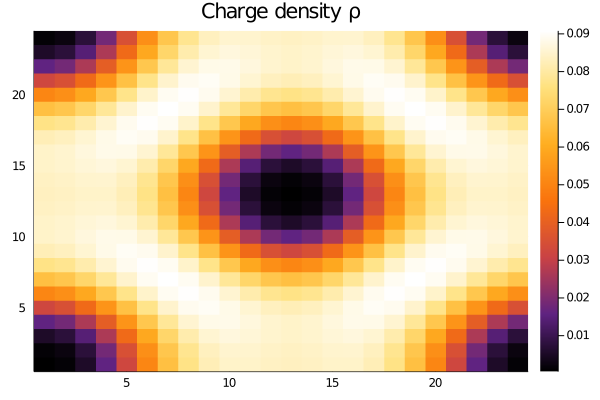

In [63]:
heatmap(scfres.ρ.real[:, :, 1, 1], c=:sunset)
title!("Charge density ρ")

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:12


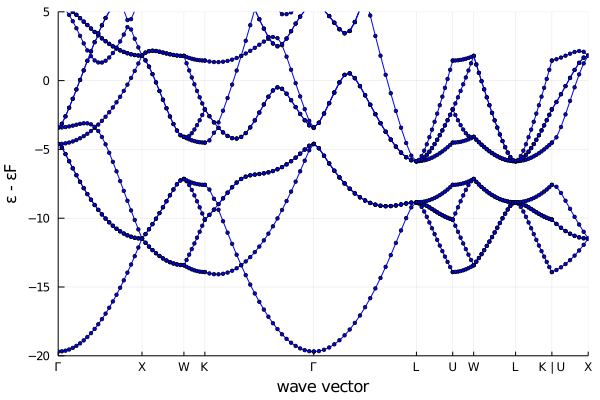

In [64]:
al_bands = plot_bandstructure(scfres, kline_density=10)
plot!(al_bands, ylims=(-20, 5), ylabel="ε - εF")

In [65]:
sum(sum(hcat(scfres.occupation...), dims=2)/35)/8

1.5354681849184775

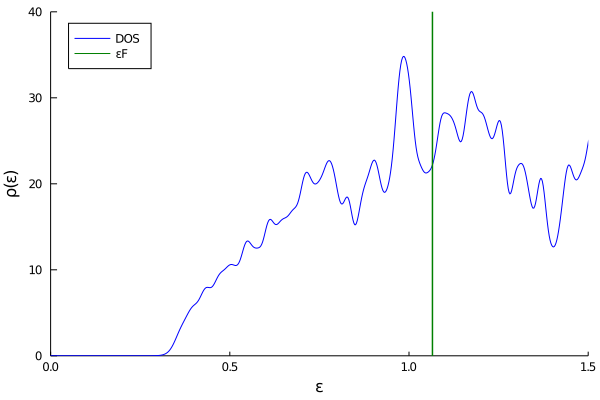

In [67]:
al_dos = plot_dos(scfres)
plot!(al_dos, ylabel="ρ(ε)", xlabel="ε", legend = :topleft, grid=false, xlims=(0.0, 1.5), ylims=(0, 40))

### Table Salt (NaCl)

#### Crystal structure
<img src="../../structure/nacl.png" alt="drawing" width="300" align="left"/>

In [68]:
# crystal structure of copper (face-centerd cubic)
a = b = c = convert2bohr(5.69169);     # lattice parameters
Na_positions = [[0, 0, 0], 
                [0, 0.5, 0.5], 
                [0.5, 0.0, 0.5], 
                [0.5, 0.5, 0.0]];
Cl_positions = [[0.5, 0.0, 0.0], 
                 [0.5, 0.5, 0.5],
                 [0.0, 0.0, 0.5], 
                 [0.0, 0.5, 0.0]];

In [69]:
lattice = [[a 0 0]; [0 b 0]; [0 0 c]]

3×3 Array{Float64,2}:
 10.739   0.0     0.0
  0.0    10.739   0.0
  0.0     0.0    10.739

In [70]:
Na = ElementPsp(:Na, psp=load_psp(:Na, functional="lda"))
Cl = ElementPsp(:Cl, psp=load_psp(:Cl, functional="lda"))
atoms = [Na => Na_positions, Cl => Cl_positions];

In [71]:
model = model_LDA(lattice, atoms, temperature=0.01);

In [72]:
Ecut = 10 # Ha
kgrid = [5, 5, 5];
basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);

In [73]:
@time scfres = self_consistent_field(basis, mixing=KerkerMixing());

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -60.96359037873         NaN   5.95e-01    3.7 
  2   -61.09164180998   -1.28e-01   1.18e-01    1.8 
  3   -61.09444723427   -2.81e-03   1.98e-02    3.4 
  4   -61.09468210954   -2.35e-04   2.78e-03    2.1 
  5   -61.09470070238   -1.86e-05   1.22e-03    4.2 
  6   -61.09470167285   -9.70e-07   2.92e-04    2.4 
 18.157995 seconds (2.34 M allocations: 1.917 GiB, 1.26% gc time)


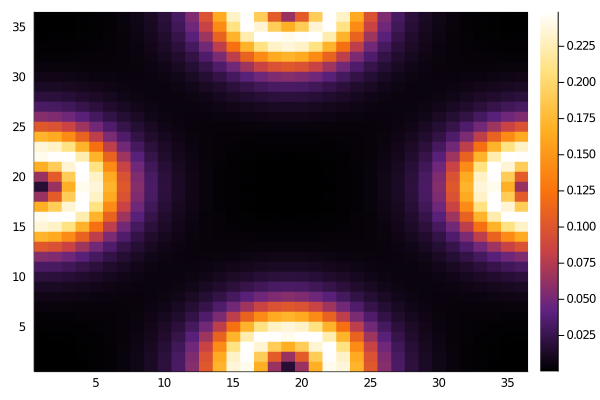

In [74]:
heatmap(scfres.ρ.real[:, :, 1, 1], c=:sunset)

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:25


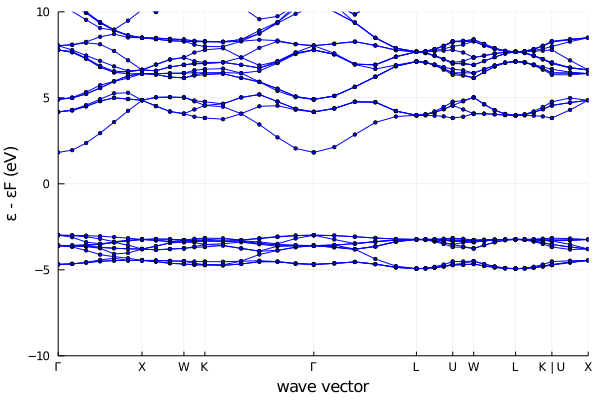

In [75]:
nacl_bands = plot_bandstructure(scfres, kline_density=5)
plot!(nacl_bands, ylabel="ε - εF (eV)", ylims=(-10, 10))

In [83]:
sum(hcat(scfres.occupation...), dims=2)/10

23×1 Array{Float64,2}:
 2.0
 2.0
 2.0
 2.0
 1.9999998875779208
 1.9999998806728556
 1.9999998603949831
 1.999998958708997
 1.9999975522451403
 1.9999970632220574
 1.9999961413567793
 1.9999943568733851
 1.9999932222810373
 1.99998852938884
 1.999981804177299
 1.999978455733757
 0.00032072518396258616
 2.1683382974273358e-7
 1.177777359806115e-7
 1.0787203637262192e-7
 5.7369861616707004e-9
 4.916128649473786e-9
 4.643086443562577e-9

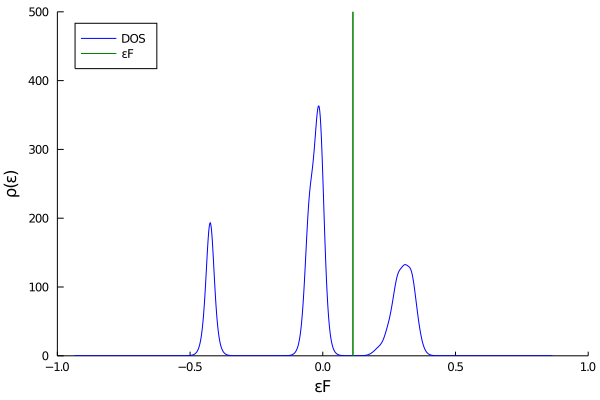

In [76]:
nacl_dos = plot_dos(scfres)
plot!(nacl_dos, ylabel="ρ(ε)", xlabel="εF", legend = :topleft, grid=false, xlims=(-1, 1), ylims=(0, 500))

# Compare & Contrast

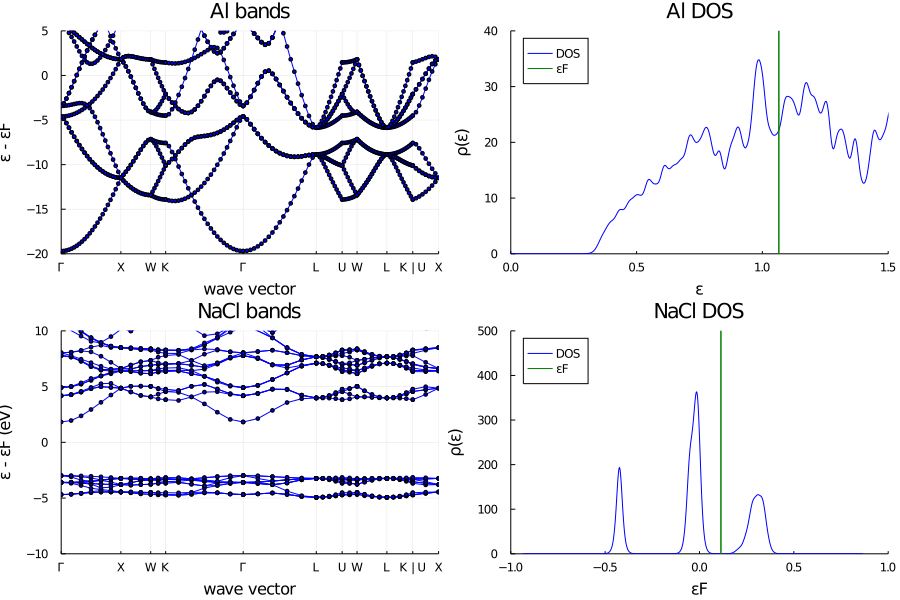

In [84]:
plot(al_bands, al_dos, nacl_bands, nacl_dos, layout = 4, size=(900, 600), title=["Al bands" "Al DOS" "NaCl bands" "NaCl DOS"])